In [1]:
import os
import cv2
import math
import torch
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
# print(all_dir)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
        # print(os.path.join(path_average, image))
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

def calculate_l2_norm(image_path1, image_path2):
    # Load images
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Check if images are loaded
    if image1 is None or image2 is None:
        raise ValueError("One or both images could not be loaded. Check the image paths.")

    # Ensure the images are of the same size
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for L2 norm calculation.")

    # Flatten the images into vectors
    vector1 = image1.flatten()
    vector2 = image2.flatten()

    # Calculate the L2 norm (Euclidean distance)
    l2_norm = np.linalg.norm(vector1 - vector2)

    return l2_norm

In [3]:
num_images = len(overall_img_path_list)
print(num_images)

67


# Calculate L2 Norm - 6795937

In [5]:
num_images = len(overall_img_path_list)

l2_norm_expression_list = np.zeros((len(overall_img_path_list),len(overall_img_path_list)))
for i in range(num_images):
    image1 = cv2.imread(overall_img_path_list[i], cv2.IMREAD_GRAYSCALE).flatten()
    for j in range(num_images):
        image2 = cv2.imread(overall_img_path_list[j], cv2.IMREAD_GRAYSCALE).flatten()
        l2_norm_expression_list[i][j] = np.linalg.norm(image1 - image2)

In [19]:
import numpy as np
l2_norm_expression_array = np.array(l2_norm_expression_list)
with open('l2_norm_unwrapp_texture_array_represent_one_per_category.npy', 'wb') as f:
    np.save(f, l2_norm_expression_list)

l2_norm_threshold_list = [100000, 125000, 150000, 175000, 200000]
counts_with_l2_bound_list = []
for l2_norm_threshold in l2_norm_threshold_list:
    counts = np.count_nonzero(l2_norm_expression_array < l2_norm_threshold, axis=1)
    counts_with_l2_bound_list.append(counts)
    print(f"maximal_number_expression_within_l2norm: {counts}")

maximal_number_expression_within_l2norm: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
maximal_number_expression_within_l2norm: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
maximal_number_expression_within_l2norm: [21  4  1  6  1  1 10  1  3  1  9  1  3  1  1  3  5 14  4  3  1 10  1  1
  7  1  1  2  7  1  1  1  1  1  1  1  1  2  3 13  1  2  1 19 12  1  1  1
  7  1  2  1  1  1  1 14  2  5  3  2 16  1 25  1  2  6  1]
maximal_number_expression_within_l2norm: [67 67 23 65 48 39 67 66 64 64 67 19 65 65 61 67 67 67 66 65 53 67 65 55
 67 66 33 63 67  5 53 55 67 67 48 61 53 64 67 67 28 66  2 67 67 64 63 67
 66 61 67 47  8  8 52 67 66 67 67 58 67 20 67 56 66 67 67]
maximal_number_expression_within_l2norm: [67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 6

In [23]:
overall_within_l2_bound = []
for count_list in counts_with_l2_bound_list:
    print(np.sum(count_list))
    overall_within_l2_bound.append(np.sum(count_list))
print(overall_within_l2_bound)

67
67
280
3790
4489
[67, 67, 280, 3790, 4489]


In [25]:
l2_norm_expression_list

array([[     0.        , 152588.06915352, 151431.88631197, ...,
        147702.48832027, 143043.52059426, 160207.71363452],
       [172797.57257554,      0.        , 154180.1038526 , ...,
        154259.55043368, 161771.31226519, 160213.81467901],
       [183527.94385597, 180819.18705713,      0.        , ...,
        178735.57526693, 178910.21162583, 179024.90952379],
       ...,
       [174549.98605557, 167371.79902242, 156548.96142102, ...,
             0.        , 165219.28052137, 160179.38974163],
       [166711.31364128, 158555.02101163, 154856.805133  , ...,
        152127.51735304,      0.        , 165335.86714322],
       [169044.7655386 , 165229.70846068, 156168.32525836, ...,
        154379.39168814, 160538.19773499,      0.        ]])

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([127746.76833486, 127780.84697084, 127814.92560681, ...,
        195835.88301818, 195869.96165416, 195904.04029014]),
 <BarContainer object of 2000 artists>)

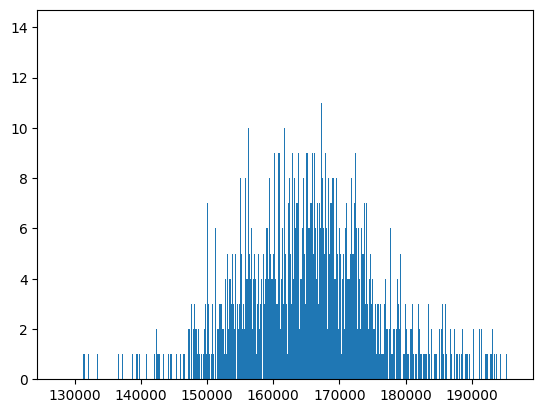

In [29]:
import matplotlib.pyplot as plt
(row, col) = np.nonzero(l2_norm_expression_list)
l2_norm_non_zero_expression_list = l2_norm_expression_array[row, col]
plt.hist(l2_norm_non_zero_expression_list, bins=2000)

In [24]:
print(np.min(l2_norm_expression_array), np.max(l2_norm_expression_array))

0.0 195904.04029013796


# Calculate MSE -- 6795937

In [30]:
overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
# print(all_dir)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
        # print(os.path.join(path_average, image))
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))


In [31]:
num_images = len(overall_img_path_list)

mse_expression_list = np.zeros((len(overall_img_path_list),len(overall_img_path_list)))
for i in range(num_images):
    image1 = cv2.imread(overall_img_path_list[i], cv2.IMREAD_GRAYSCALE).flatten()
    for j in range(num_images):
        image2 = cv2.imread(overall_img_path_list[j], cv2.IMREAD_GRAYSCALE).flatten()
        mse_expression_list[i][j] = np.square(image1 - image2).mean()

In [32]:
import numpy as np
mse_expression_array = np.array(mse_expression_list)
with open('mse_unwrapp_texture_array_represent_one_per_category.npy', 'wb') as f:
    np.save(f, mse_expression_list)

mse_threshold_list = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
counts_with_l2_bound_list = []
for mse_threshold in mse_threshold_list:
    counts = np.count_nonzero(mse_expression_array < mse_threshold, axis=1)
    counts_with_l2_bound_list.append(counts)
    print(f"maximal_number_expression_within_mse: {counts}")

maximal_number_expression_within_mse: [67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67]
maximal_number_expression_within_mse: [67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67]
maximal_number_expression_within_mse: [67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67]
maximal_number_expression_within_mse: [67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67]
maximal_number_expression_wi

(array([2., 0., 0., ..., 0., 0., 2.]),
 array([ 1.82006741,  1.8437331 ,  1.86739879, ..., 49.10412449,
        49.12779018, 49.15145588]),
 <BarContainer object of 2000 artists>)

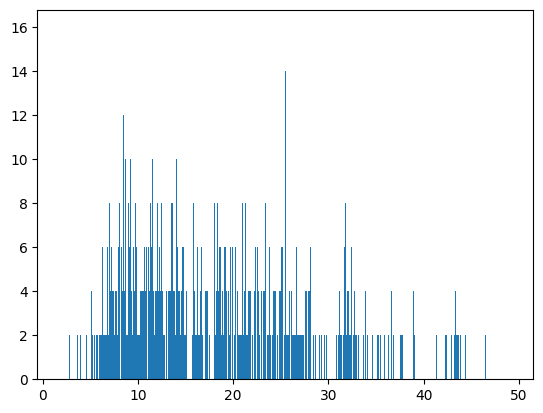

In [33]:
import matplotlib.pyplot as plt
(row, col) = np.nonzero(mse_expression_list)
mse_non_zero_expression_list = mse_expression_array[row, col]
plt.hist(mse_non_zero_expression_list, bins=2000)

# Calculate L2 Norm - 6795937 + 6674443


In [4]:
overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

path_prefix = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

In [5]:
num_images = len(overall_img_path_list)

l2_norm_expression_list = np.zeros((len(overall_img_path_list),len(overall_img_path_list)))
for i in range(num_images):
    image1 = cv2.imread(overall_img_path_list[i], cv2.IMREAD_GRAYSCALE).flatten()
    for j in range(num_images):
        image2 = cv2.imread(overall_img_path_list[j], cv2.IMREAD_GRAYSCALE).flatten()
        l2_norm_expression_list[i][j] = np.linalg.norm(image1 - image2)

In [7]:
import numpy as np
l2_norm_expression_array = np.array(l2_norm_expression_list)
with open('l2_norm_unwrapp_texture_array_represent_one_per_category_6674443_6795937.npy', 'wb') as f:
    np.save(f, l2_norm_expression_list)

l2_norm_threshold_list = [100000, 125000, 150000, 175000, 200000]
counts_with_l2_bound_list = []
for l2_norm_threshold in l2_norm_threshold_list:
    counts = np.count_nonzero(l2_norm_expression_array < l2_norm_threshold, axis=1)
    counts_with_l2_bound_list.append(counts)
    print(f"maximal_number_expression_within_l2norm: {counts}")
print(np.min(l2_norm_expression_array), np.max(l2_norm_expression_array))

maximal_number_expression_within_l2norm: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
maximal_number_expression_within_l2norm: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 6 1 1 2 1 7 1 2 1 1 2 1 1 1 1 1 1]
maximal_number_expression_within_l2norm: [58 26  8 28  1 10 31 10 22  7 30  1 20  4  7 25 22 50 20 21 22 21  1 12
 25  1  8 24 39  1 19 10  5 13 23  7  5 27 14 36  6 12  3 51 35  7 12  7
 39  1 16 17  1  1 18 36  8 26 22 15 26  1 49  1 21 29 12  1 26  5  2 20
  3  2 18  3 42  2 22 15  8  3  1  8 18 18  1  1  3  2  8 12  1 10  1  2
 27  3 14  1  6 17  4  1  1  6  2 20 20  1  2  3 21

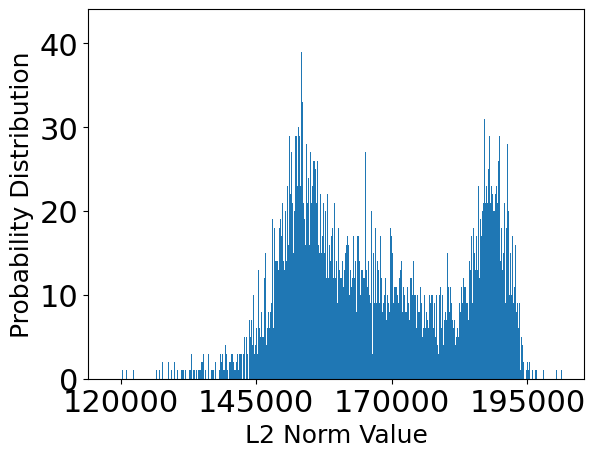

In [13]:
import matplotlib.pyplot as plt
(row, col) = np.nonzero(l2_norm_expression_list)
l2_norm_non_zero_expression_list = l2_norm_expression_array[row, col]
plt.hist(l2_norm_non_zero_expression_list, bins=2000)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Probability Distribution", fontsize=SMALL_SIZE)
plt.xlabel("L2 Norm Value", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.xticks(np.arange(120000, 200000, 25000))

plt.savefig('L2_norm_full_texture_info.pdf', bbox_inches="tight", transparent=True) 

plt.show()

In [40]:
num_images = len(overall_img_path_list)

mse_expression_list = np.zeros((len(overall_img_path_list),len(overall_img_path_list)))
for i in range(num_images):
    image1 = cv2.imread(overall_img_path_list[i], cv2.IMREAD_GRAYSCALE).flatten()
    for j in range(num_images):
        image2 = cv2.imread(overall_img_path_list[j], cv2.IMREAD_GRAYSCALE).flatten()
        mse_expression_list[i][j] = np.square(image1 - image2).mean()

In [41]:
import numpy as np

mse_expression_array = np.array(mse_expression_list)
with open('mse_unwrapp_texture_array_represent_one_per_category_6674443_6795937.npy', 'wb') as f:
    np.save(f, mse_expression_list)

mse_threshold_list = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
counts_with_l2_bound_list = []
for mse_threshold in mse_threshold_list:
    counts = np.count_nonzero(mse_expression_array < mse_threshold, axis=1)
    counts_with_l2_bound_list.append(counts)
    print(f"maximal_number_expression_within_mse: {counts}")

maximal_number_expression_within_mse: [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
maximal_number_expression_within_mse: [5 1 1 2 1 1 5 1 1 1 1 1 1 1 1 2 5 3 2 5 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 5 3 1 1 1 3 1 1 1 1 1 2 3 1 1 2 2 1 1 1 1 5 6 1 1 2 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1
 1 2 1 2 1 1 1 3 1 1 1 1 1 2 2 1 1 1 2 1]
maximal_number_expression_within_mse: [28 22  1 26  1 23 32  1 11 12 33  1 29  1  7 25 32 24 30 28 21  1  1  2
 26  1  1  6 23  1 30 21  1  1  1  5  1  3  8 32  1  1  1 29 30  1  1  1
 21  1  1 18  1  1 30 31  5 26 31 26  2  1 21  1 34 30 20  1 14  6  1  8
  6  1  1  1  2  1  8  2  6  1  1  1  2  5  1  1  1  1  2 13  1  6  1  1
  2  4  1  1 10  9  1  1  1  1  1 13  1  1  2  1  7 11 14  8

(array([2., 0., 0., ..., 0., 0., 2.]),
 array([ 1.82006741,  1.86757287,  1.91507833, ..., 96.73598177,
        96.78348724, 96.8309927 ]),
 <BarContainer object of 2000 artists>)

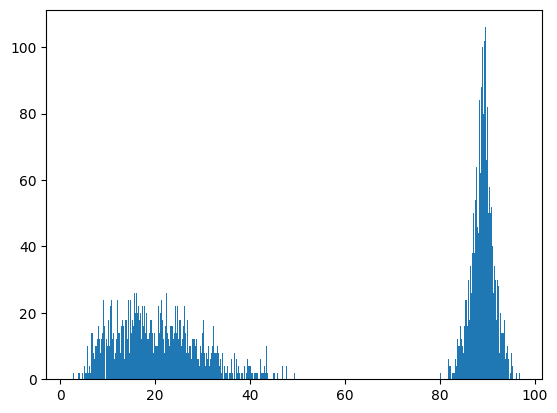

In [43]:
import matplotlib.pyplot as plt
(row, col) = np.nonzero(mse_expression_list)
mse_non_zero_expression_list = mse_expression_array[row, col]
plt.hist(mse_non_zero_expression_list, bins=2000)